In [201]:
import pandas as pd
import tweepy
import time
import json
# from replies import *
from pprint import pprint
# from config import consumer_key, consumer_secret, access_token, access_token_secret
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
consumer_key = f'oypRxofLOoARuFD61NQ8gZlhK'
consumer_secret = f'F4qJiwciKfhmiPrcWJTJ0dLhx94PaBmRhSXbAoZqUH8MxgQUeN'
access_token = f'998710477411835904-eQYIo9recCc1JzqaaHjiL03bzWkR1Vx'
access_token_secret = f'7JZmaIXCDYMOauLJhcSm6S5U5IbxkMOUkCXncNdpEuvVu'

In [202]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [203]:
#  state_fn = ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "DC", "Delaware", "Florida", "Georgia", 
#            "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", 
#            "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", 
#            "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", 
#            "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washingtion", "West Virginia", "Wyoming"]

In [204]:
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

In [218]:
# Target Term
target_user = "@realDonaldTrump"

# Get all tweets from target user
tweet_list = []
public_tweets = api.user_timeline(target_user, page=1)
original_tweet = 0
# Loop through all tweets
for i, tweet in enumerate(public_tweets):
    tweet_list.append(tweet)
    replies_list = []
    orginal_tweet = tweet.get('id')

    replies = api.search(q='to:@realDonaldTrump',since_id=tweet.get('id'),count=100,geocode='41.8781,-87.6298,2000mi')
    while len(replies.get('statuses')) > 0 and replies.get('statuses')[0].get('id') > original_tweet:
        for reply in replies["statuses"]:
#             if reply.get('coordinates') != None:
            replies_list.append(reply) 
        replies = api.search(q='to:@realDonaldTrump',since_id=reply.get('id'), count=100,geocode='41.8781,-87.6298,2000mi')
        original_tweet = reply.get('id')
        if (len(replies_list) > 6000):
            break
    break

RateLimitError: [{'message': 'Rate limit exceeded', 'code': 88}]

In [206]:
# # Target Term
# target_user = "@realDonaldTrump"

# # Get all tweets from target user
# tweet_list = []
# public_tweets = api.user_timeline(target_user, page=1)
# original_tweet = 0
# # Loop through all tweets
# for i, tweet in enumerate(public_tweets):
#     tweet_list.append(tweet)
#     replies_list = []
#     orginal_tweet = tweet.get('id')

#     replies = api.search(q='to:@realDonaldTrump',since_id=tweet.get('id'),count=100,geocode='41.8781,-87.6298,2000mi')
#     while len(replies.get('statuses')) > 0 and replies.get('statuses')[0].get('id') > original_tweet:
#         for reply in replies["statuses"]:
# #             if reply.get('coordinates') != None:
#             replies_list.append(reply) 
#         replies = api.search(q='to:@realDonaldTrump',since_id=reply.get('id'), count=100,geocode='41.8781,-87.6298,2000mi')
#         original_tweet = reply.get('id')
#         if (len(replies_list) > 6000):
#             break
#     break

In [207]:
len(tweet_list), len(replies_list)

(1, 6078)

In [208]:
flat_replies = []
# found_State = False
for reply in replies_list:
   if len(reply.get('user').get('location')) > 0:
       found = False
       for state in states:
           if (reply.get('user').get('location').find(state) > 0):
               found = True
               break
       # Run Vader Analysis on each tweet
       if found:
           results = analyzer.polarity_scores(reply.get('text'))
           reply_dict = {'id': reply.get('id'),
                       'text' : reply.get('text'),
                       'location': state,
                       'compound': results["compound"],
                       'pos': results["pos"],
                       'neu': results["neu"],
                       'neg': results["neg"]}
           flat_replies.append(reply_dict)

In [209]:
pprint(tweet_list[0].get('id')), pprint(tweet_list[0].get('created_at')), pprint(tweet_list[0].get('text'))

1006891643985854464
'Wed Jun 13 13:30:49 +0000 2018'
('So funny to watch the Fake News, especially NBC and CNN. They are fighting '
 'hard to downplay the deal with North Kor… https://t.co/khUajnNtoR')


(None, None, None)

In [210]:
replies_df = pd.DataFrame(replies_list)

replies_list[0].get('user').get('location')
replies_list[0]

{'contributors': None,
 'coordinates': None,
 'created_at': 'Wed Jun 13 17:25:56 +0000 2018',
 'entities': {'hashtags': [],
  'symbols': [],
  'urls': [{'display_url': 'twitter.com/i/web/status/1…',
    'expanded_url': 'https://twitter.com/i/web/status/1006950813183430656',
    'indices': [121, 144],
    'url': 'https://t.co/gyfwM67A2v'}],
  'user_mentions': [{'id': 25073877,
    'id_str': '25073877',
    'indices': [0, 16],
    'name': 'Donald J. Trump',
    'screen_name': 'realDonaldTrump'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 1006950813183430656,
 'id_str': '1006950813183430656',
 'in_reply_to_screen_name': 'realDonaldTrump',
 'in_reply_to_status_id': 1006891643985854464,
 'in_reply_to_status_id_str': '1006891643985854464',
 'in_reply_to_user_id': 25073877,
 'in_reply_to_user_id_str': '25073877',
 'is_quote_status': False,
 'lang': 'en',
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'place': None,
 'possibly_sensitive': False,
 're

In [237]:
replies_df = pd.DataFrame(flat_replies)
replies_df

None

In [212]:
state_compound_fakenews = replies_df.groupby("location")["compound"].mean().reset_index()

In [213]:
state_compound_fakenews

state_compound_fakenews.to_csv("state_compound_fakenews.csv", encoding="utf-8", index=False)

In [220]:
state_pos_fakenews = replies_df.groupby("location")["pos"].mean().reset_index()

In [221]:
state_pos_fakenews

state_pos_fakenews.to_csv("state_pos_fakenews", encoding="utf-8", index=False)

In [222]:
state_neg_fakenews = replies_df.groupby("location")["neg"].mean().reset_index()

In [224]:
state_neg_fakenews.to_csv("state_neg_fakenews.csv", encoding="utf-8", index=False)

In [238]:
replies_df.sort_values(by=['location'])

None

(-1, 1)

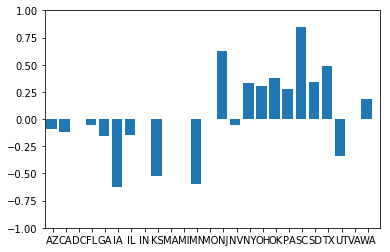

In [145]:
import numpy as np
import matplotlib.pyplot as plt

state_bar = state_compound_df['location']
state_compound = state_compound_df['compound']
x_axis = np.arange(0, len(state_bar), 1)
plt.bar(x_axis, state_compound, align="center")
# Set x axis tick locations
tick_locations = [value+.1 for value in x_axis]
plt.xticks(tick_locations, state_bar)



# Set the limits of the x axis
plt.xlim(-0.5, len(x_axis))

# Set the limits of the y axis
plt.ylim(-1, 1)

In [146]:
import folium

In [239]:
USA_COORDINATES = (41.8781,-87.6298)

state_geo = r'state.geo.json'

map = folium.Map(location=USA_COORDINATES, zoom_start=4)
# map.geojson(geo_path='state.geo.json')
# map
# folium.GeoJson(data='state.geojson.json',
#              ).add_to(map)
# display(map)
map.choropleth(geo_data='state.geo.json',
                  data=state_compound_df,
                 columns=['location', 'compound'],
                 key_on='feature.properties.STUSPS10',
                 fill_color='BuPu')

map

None

In [148]:
tweet_2_06_11_18 = 'A year ago the pundits & talking heads, people that couldn’t do the job before, were begging for conciliation and peace - “please meet, don’t go to war.” Now that we meet and have a great relationship with Kim Jong Un, the same haters shout out, “you shouldn’t meet, do not meet!”'
results = analyzer.polarity_scores(tweet_2_06_11_18)
pos = results["pos"]
neg = results["neg"]
neu = results["neu"]
comp = results["compound"]

In [149]:
tweet_2_06_11_18_df =[pos, neg, neu, comp]

In [150]:
tweet_2_06_11_18_df

[0.141, 0.057, 0.802, 0.69]

In [157]:
tweet_sentiment2 = pd.read_csv('cleaned_tweet2_sentiment.csv')

In [158]:
tweet_sentiment2

,State,Trump Proportion,compound,pos,neg
0,AZ,0.518900,0.028076,0.060397,0.055500
1,CA,0.338718,0.218328,0.134917,0.152056
2,FL,0.506188,-0.148242,0.050032,0.267753
3,GA,0.526612,-0.381681,0.003407,0.137578
4,IL,0.409799,0.322221,0.139192,0.000000
5,MA,0.353487,0.690200,0.251000,0.000000
6,MN,0.491715,-0.542300,0.000000,0.368000
7,MO,0.590898,0.874500,0.500000,0.000000
8,NC,0.519037,0.000000,0.000000,0.000000
9,NJ,0.427158,0.440400,0.132000,0.000000


(-1, 1)

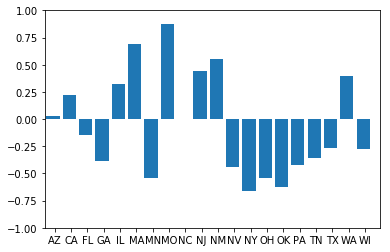

In [190]:
state_bar = tweet_sentiment2['State']
state_compound = tweet_sentiment2['compound']
x_axis = np.arange(0, len(state_bar), 1)
plt.bar(x_axis, state_compound, align="center")
# Set x axis tick locations
tick_locations = [value+.1 for value in x_axis]
plt.xticks(tick_locations, state_bar)



# Set the limits of the x axis
plt.xlim(-0.5, len(x_axis))

# Set the limits of the y axis
plt.ylim(-1, 1)

In [159]:
from scipy.stats import linregress

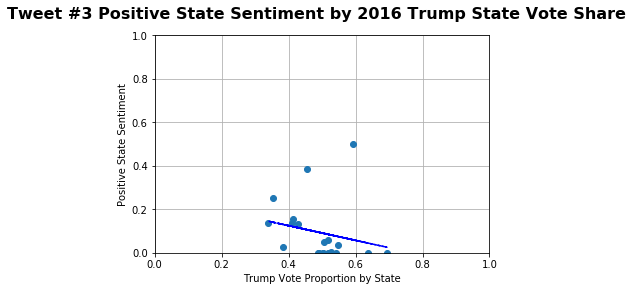

In [189]:
# Set data
x_axis = tweet_sentiment2['Trump Proportion']
y_axis= tweet_sentiment2['pos']

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("Tweet #3 Positive State Sentiment by 2016 Trump State Vote Share", fontsize=16, fontweight="bold")

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.set_xlabel("Trump Vote Proportion by State")
ax.set_ylabel("Positive State Sentiment")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.grid()

plt.show()



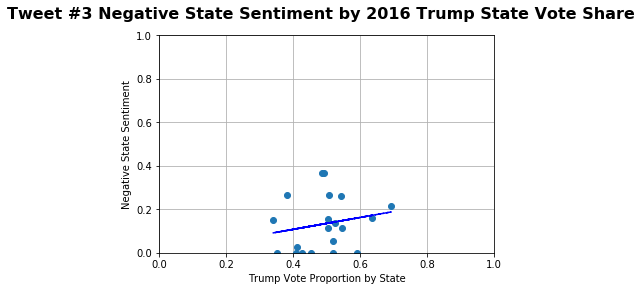

In [173]:
# Set data
x_axis = tweet_sentiment2['Trump Proportion']
y_axis= tweet_sentiment2['neg']

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("Tweet #3 Negative State Sentiment by 2016 Trump State Vote Share", fontsize=16, fontweight="bold")

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.set_xlabel("Trump Vote Proportion by State")
ax.set_ylabel("Negative State Sentiment")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.grid()

plt.show()



In [176]:
tweet1_sentiment= pd.read_csv('state_sentiment_df_612_1.csv')

In [177]:
tweet1_sentiment

,location,compound,pos,neg,Trump Proportion of Vote
0,AZ,0.061738,0.024750,0.000000,0.518900
1,CA,-0.207264,0.046989,0.129492,0.338718
2,CO,0.627864,0.285780,0.000000,0.473167
3,CT,0.000000,0.000000,0.000000,0.428585
4,FL,0.163955,0.154283,0.098233,0.506188
5,GA,0.010480,0.033350,0.046410,0.526612
6,IA,0.874100,0.473000,0.000000,0.550635
7,IL,0.205484,0.123316,0.108758,0.409799
8,KY,0.318200,0.365000,0.000000,0.656706
9,MA,-0.306165,0.000000,0.150824,0.353487


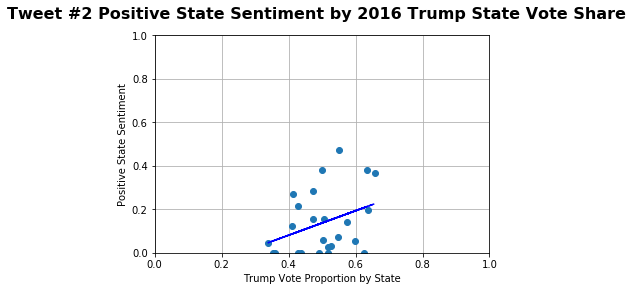

In [180]:
# Set data
x_axis = tweet1_sentiment['Trump Proportion of Vote']
y_axis= tweet1_sentiment['pos']

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("Tweet #2 Positive State Sentiment by 2016 Trump State Vote Share", fontsize=16, fontweight="bold")

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.set_xlabel("Trump Vote Proportion by State")
ax.set_ylabel("Positive State Sentiment")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.grid()

plt.show()



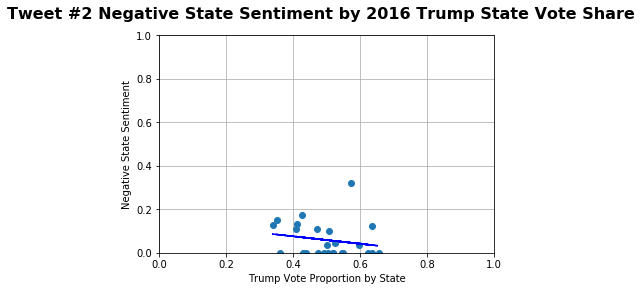

In [181]:
# Set data
x_axis = tweet1_sentiment['Trump Proportion of Vote']
y_axis= tweet1_sentiment['neg']

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("Tweet #2 Negative State Sentiment by 2016 Trump State Vote Share", fontsize=16, fontweight="bold")

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.set_xlabel("Trump Vote Proportion by State")
ax.set_ylabel("Negative State Sentiment")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.grid()

plt.show()



(-1, 1)

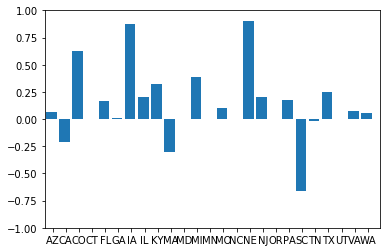

In [194]:
state_bar = tweet1_sentiment['location']
state_compound = tweet1_sentiment['compound']
x_axis = np.arange(0, len(state_bar), 1)
plt.bar(x_axis, state_compound, align="center")
# Set x axis tick locations
tick_locations = [value+.1 for value in x_axis]
plt.xticks(tick_locations, state_bar)



# Set the limits of the x axis
plt.xlim(-0.5, len(x_axis))

# Set the limits of the y axis
plt.ylim(-1, 1)

In [182]:
otweet_sentiment = pd.read_csv('0tweet_sentiment.csv')

In [183]:
otweet_sentiment

,State,compound,Trump Vote,pos,neg
0,AZ,-0.093826,0.518900,0.099978,0.082609
1,CA,-0.115143,0.338718,0.110538,0.149931
2,DC,0.000000,0.043048,0.000000,0.000000
3,FL,-0.053810,0.506188,0.111208,0.130272
4,GA,-0.157168,0.526612,0.000000,0.072212
5,IA,-0.626900,0.550635,0.000000,0.255000
6,IL,-0.144674,0.409799,0.000000,0.049827
7,IN,0.000000,0.601173,0.000000,0.000000
8,KS,-0.526700,0.611115,0.000000,0.254000
9,MA,0.000000,0.353487,0.000000,0.000000


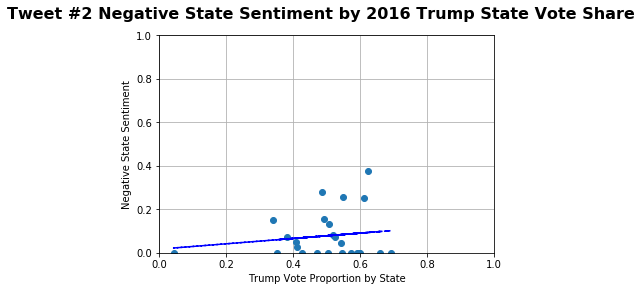

In [185]:
# Set data
x_axis = otweet_sentiment['Trump Vote']
y_axis= otweet_sentiment['neg']

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("Tweet #1 Negative State Sentiment by 2016 Trump State Vote Share", fontsize=16, fontweight="bold")

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.set_xlabel("Trump Vote Proportion by State")
ax.set_ylabel("Negative State Sentiment")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.grid()

plt.show()



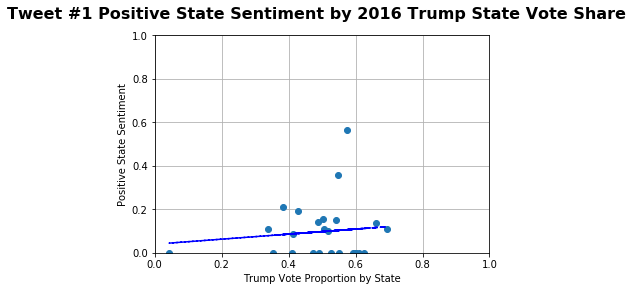

In [188]:
# Set data
x_axis = otweet_sentiment['Trump Vote']
y_axis= otweet_sentiment['pos']

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("Tweet #1 Positive State Sentiment by 2016 Trump State Vote Share", fontsize=16, fontweight="bold")

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.set_xlabel("Trump Vote Proportion by State")
ax.set_ylabel("Positive State Sentiment")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.grid()

plt.show()



(-1, 1)

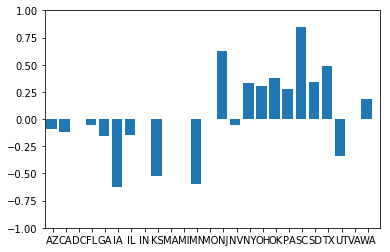

In [192]:
state_bar = otweet_sentiment['State']
state_compound = otweet_sentiment['compound']
x_axis = np.arange(0, len(state_bar), 1)
plt.bar(x_axis, state_compound, align="center")
# Set x axis tick locations
tick_locations = [value+.1 for value in x_axis]
plt.xticks(tick_locations, state_bar)



# Set the limits of the x axis
plt.xlim(-0.5, len(x_axis))

# Set the limits of the y axis
plt.ylim(-1, 1)

In [195]:
tweet_2_06_12_18 = f'Its time for another #MAGA rally. Join me in Duluth, Minnesota on Wednesday, June 20th at 6:30pm! Tickets➜http://donaldjtrump.com/rallies/duluth-mn-june-2018 …'
results = analyzer.polarity_scores(tweet_2_06_12_18)
pos = results["pos"]
neg = results["neg"]
neu = results["neu"]
comp = results["compound"]

In [197]:
comp 

0.69

In [198]:
pos

0.141

In [199]:
neg

0.057

In [200]:
neu

0.802

In [219]:
state_compound_fakenews

,location,compound
0,AZ,0.000000
1,CA,0.200108
2,CO,0.294304
3,CT,-0.086900
4,DC,-0.140571
5,DE,0.000000
6,FL,0.000000
7,IL,-0.558956
8,IN,0.735100
9,KS,0.000000


In [228]:
tweet_fakenews = pd.read_csv('state_fakenews_df.csv')

In [240]:
tweet_fakenews

None

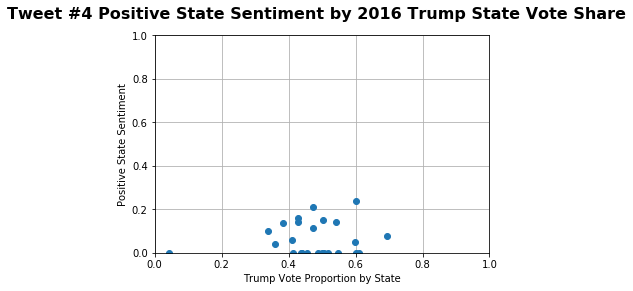

In [231]:
# Set data
x_axis = tweet_fakenews['TrumpVote']
y_axis= tweet_fakenews['pos']

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("Tweet #4 Positive State Sentiment by 2016 Trump State Vote Share", fontsize=16, fontweight="bold")

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.set_xlabel("Trump Vote Proportion by State")
ax.set_ylabel("Positive State Sentiment")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.grid()

plt.show()



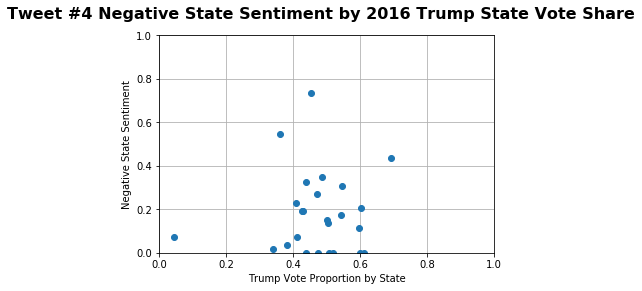

In [232]:
# Set data
x_axis = tweet_fakenews['TrumpVote']
y_axis= tweet_fakenews['neg']

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("Tweet #4 Negative State Sentiment by 2016 Trump State Vote Share", fontsize=16, fontweight="bold")

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.set_xlabel("Trump Vote Proportion by State")
ax.set_ylabel("Negative State Sentiment")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.grid()

plt.show()



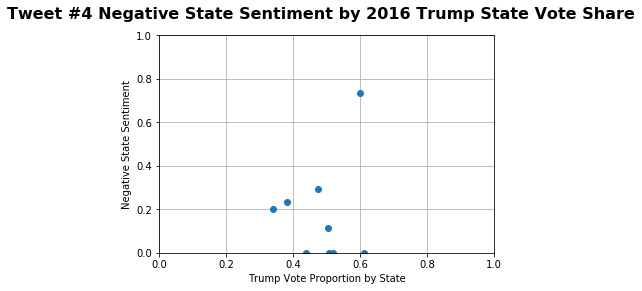

In [233]:
# Set data
x_axis = tweet_fakenews['TrumpVote']
y_axis= tweet_fakenews['compound']

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("Tweet #4 Negative State Sentiment by 2016 Trump State Vote Share", fontsize=16, fontweight="bold")

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.set_xlabel("Trump Vote Proportion by State")
ax.set_ylabel("Negative State Sentiment")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.grid()

plt.show()

